#### <font color='blue'>  DECISION TREES:
 * A Decison tree are supervised machine learning algorithm that split data into smaller parts using decision rules(likes yes/no questions) until it reaches a prediciton.

##### <font color='red'> Two types decision trees
* 1.Regression- when the target is a number (ex: price,score)
* 2.Classification- when the target is a category (ex: yes/no,pass/fail)

##### <font color='light sky'> Summary:
* Decision tree are supervised machine learning algorithm used for both regerssion and classification models that split the data into branches to make predictions.in classification,they predict a category using entropy (or) gini. In Regression they predict a number using variance reduction. 


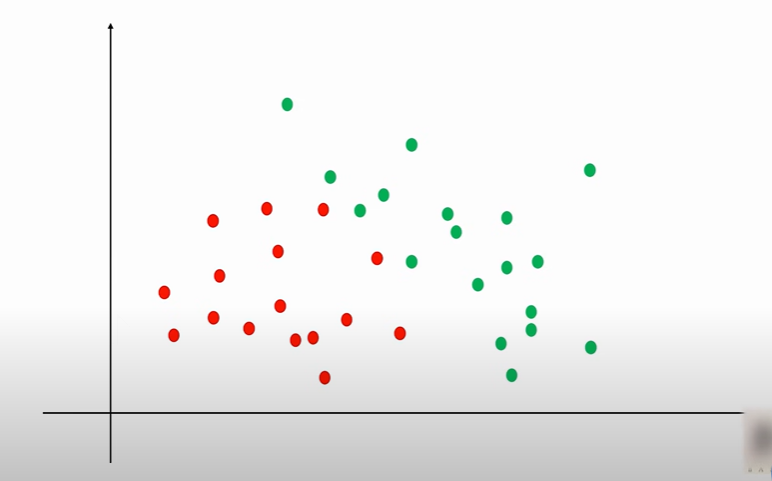

In [6]:
#example:Classification problem
from PIL import Image
Image.open('dt.png')

#when our data set like this it can easly saparated by draw a dicision boundary using logistic regression  

* when our data set like this it can easly saparated by draw a dicision boundary using logistic regression . 

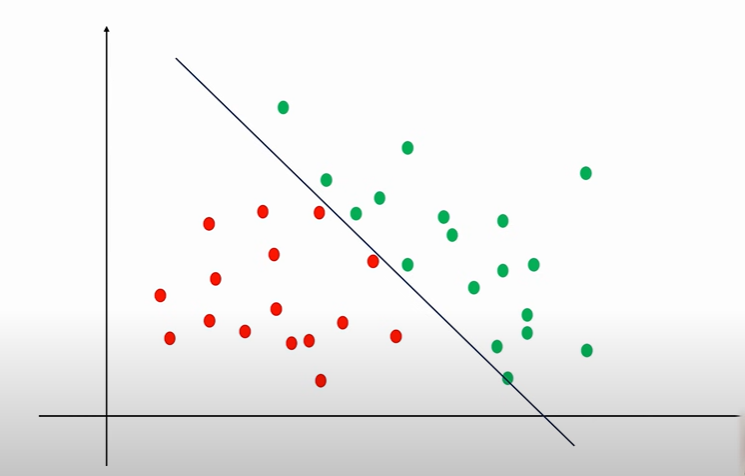

In [11]:
Image.open('dt1.png')

* the data complex like this  we can't draw a single line.

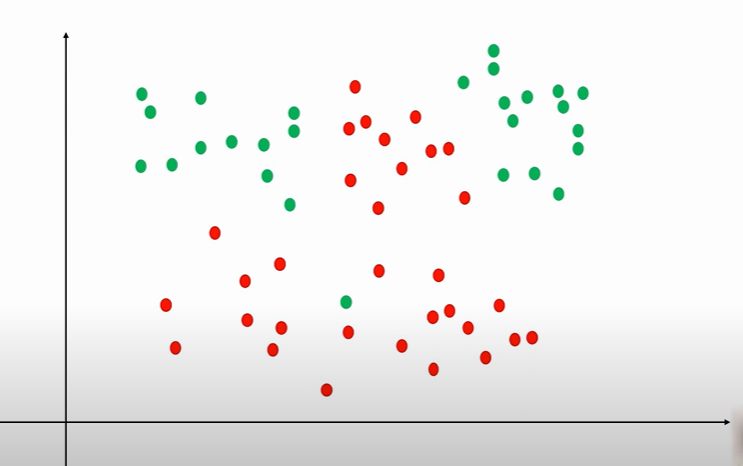

In [16]:
Image.open('dt2.png')

* we can draw might have to split the data set again and again to come with decision boundary's.

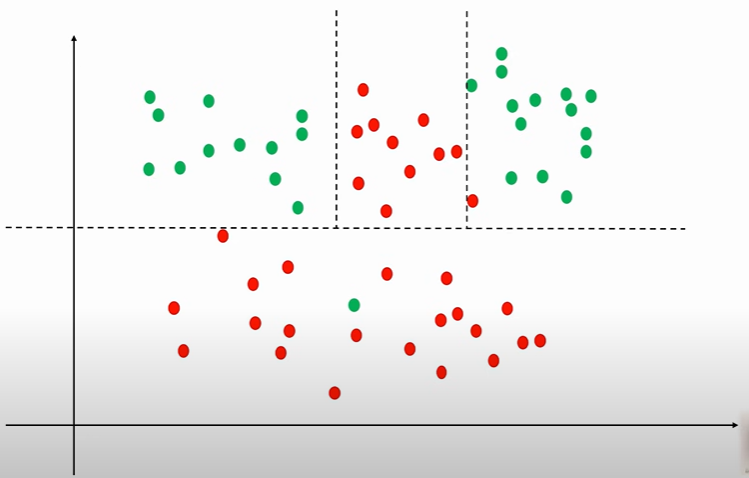

In [23]:
Image.open('dt3.png')

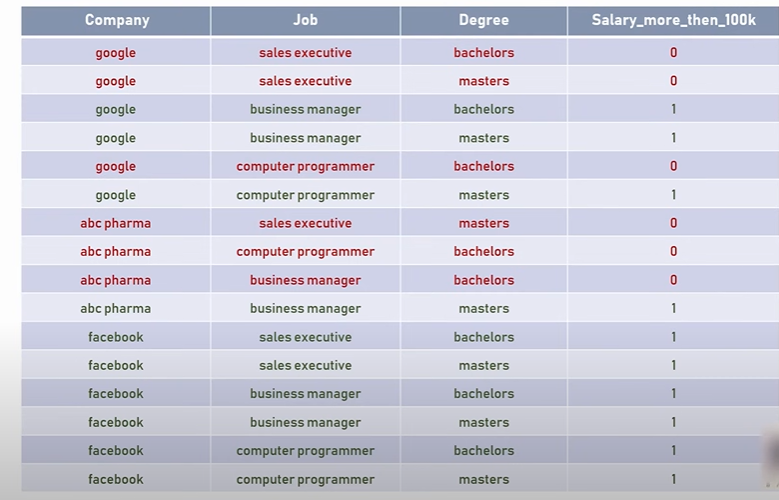

In [25]:
# example : data set image 
Image.open('dt4.png')

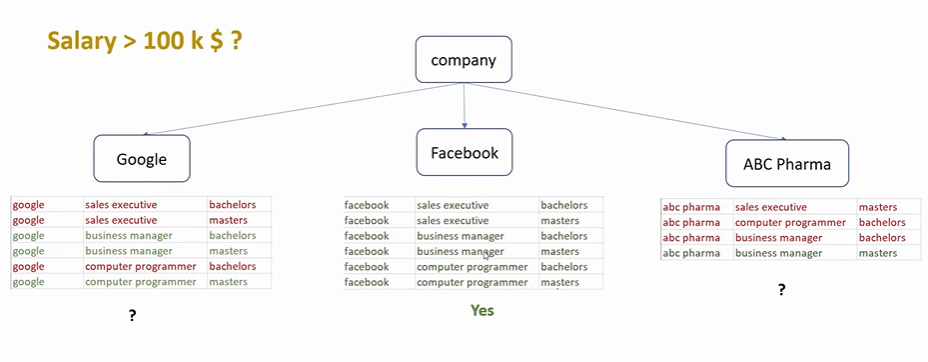

In [27]:
#step =1 split the data set 
Image.open('dt5.png')

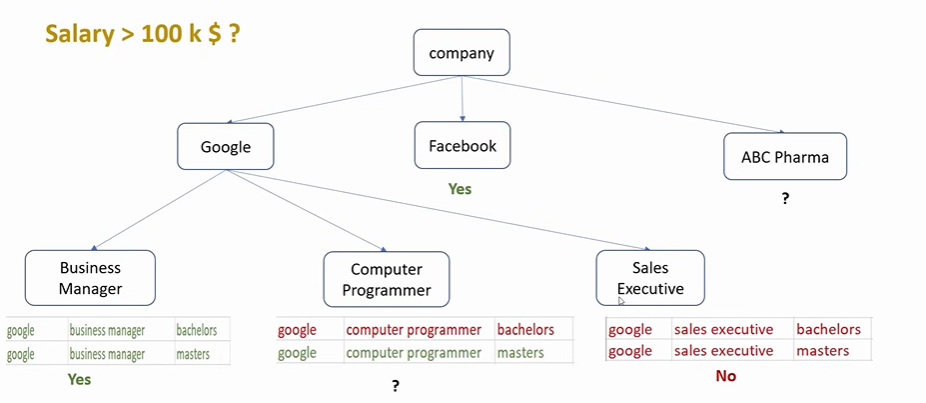

In [29]:

Image.open('dt6.png')

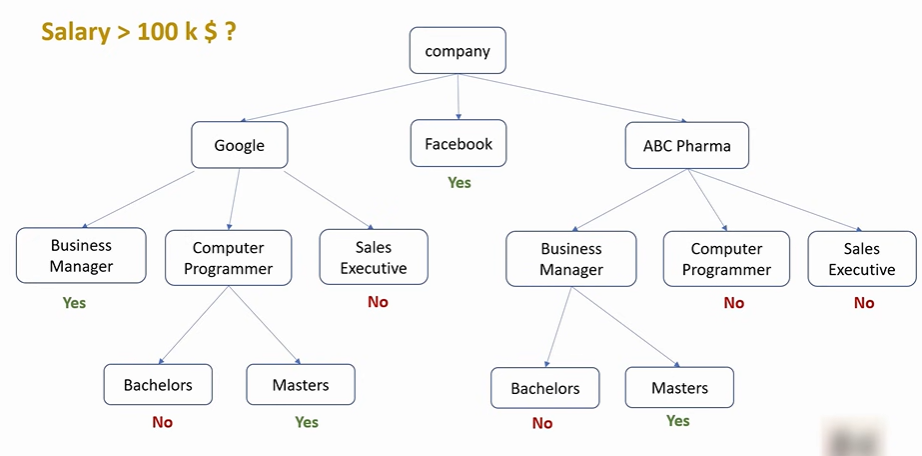

In [33]:
Image.open('dt7.png')

### <font color='red'> How do you select ordering of features?

* here we use "Entropy and Information gain"
#### <font color='red'>Entropy
* Measures impurity or disorder in the data
* low entropy= pure class group
* high entropy= mixed class group

#### <font color='red'>Infromation Gain(IG)
* Measures how much entropy is reduced after a split
* higher ig= better feature to split on

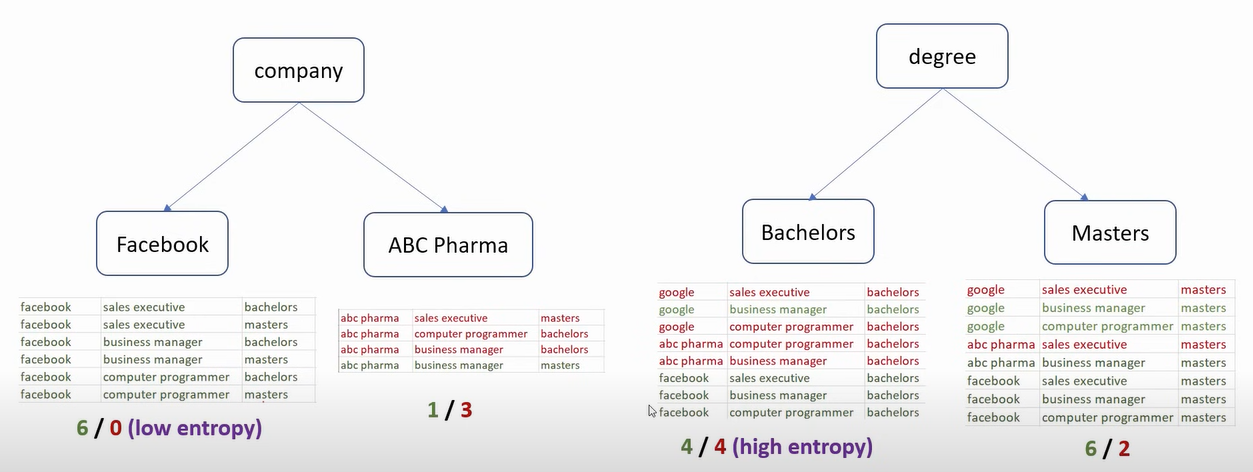

In [40]:
Image.open('dt8.png')


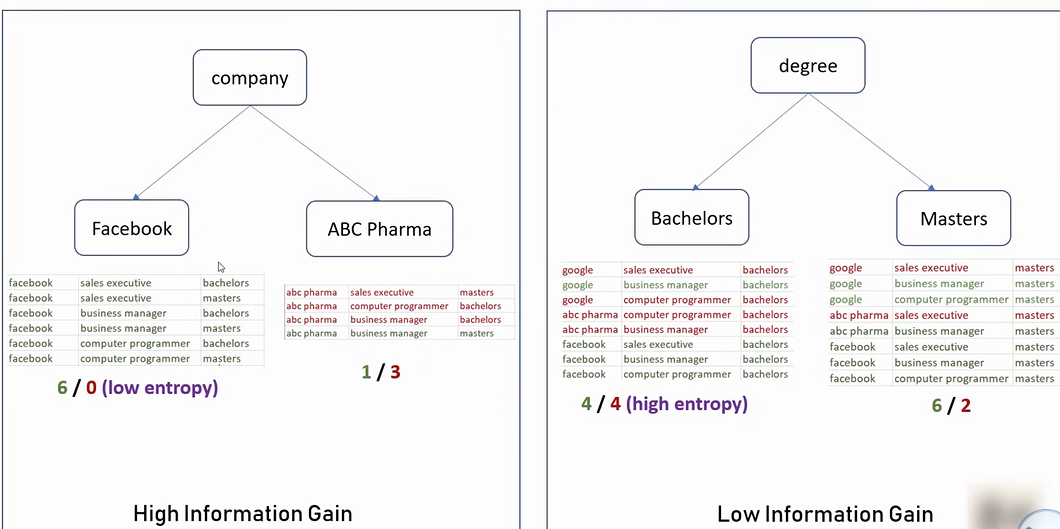

In [42]:
Image.open('dt9.png')

###  Feature 1: company
Split groups:

* Facebook → all 6 records are clearly separated into their classes → entropy = 0

* ABC Pharma → 1 job vs 3 jobs → not perfect, but better than equal split

- → Total Entropy = Low
- → Information Gain = High 
- → Preferred as root split

###  Feature 2: degree
Split groups:

* Bachelors → 4 different job roles = high entropy

* Masters → mixed roles again = some impurity

- → Total Entropy = High
- → Information Gain = Low 
- → Not chosen for splitting



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:salaries.csv")

In [5]:
df.head(10)

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes


In [9]:
df.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [11]:
df.shape

(16, 4)

In [13]:
inputs=df.drop('salary_more_then_100k',axis='columns') #independent variables taken like inputs
target=df['salary_more_then_100k']

In [15]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [17]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [23]:
### convert label to numaric using label encoders,onehot encoders
from sklearn.preprocessing import LabelEncoder
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [27]:
inputs['company_n']=le_company.fit_transform(inputs['company'])
inputs['job_n']=le_job.fit_transform(inputs['job'])
inputs['degree_n']=le_degree.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [29]:
# here drop all label columns
inputs_n=inputs.drop(['company','job','degree'],axis='columns')
inputs_n

# google has -2
#abc pharma -0
#facebook-1

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [35]:
x=inputs_n.iloc[:,].values
y=target.iloc[:,].values

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=0)

In [43]:
x_train

array([[1, 0, 1],
       [2, 1, 0],
       [2, 0, 0],
       [1, 1, 0],
       [1, 2, 0],
       [0, 1, 0],
       [1, 1, 1],
       [1, 2, 1],
       [2, 0, 1],
       [2, 2, 0],
       [2, 1, 1],
       [1, 0, 0]])

In [45]:
x_test

array([[2, 2, 1],
       [0, 2, 1],
       [0, 0, 0],
       [0, 0, 1]])

In [47]:
y_train

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [49]:
y_test

array([0, 0, 0, 1], dtype=int64)

In [53]:
from sklearn import tree
model =tree.DecisionTreeClassifier()
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [57]:
# i will check my model score

model.score(inputs_n,target)

1.0

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
# here i'm predict google-company,sales executive-job and master in degree .
#lbel encoding numbers to predict the target value is salary

model.predict([[2,2,1]])

array([0], dtype=int64)

In [69]:
#one more now how about business managers
#label encoding number is 2,0,0
model.predict([[2,0,0]])

array([1], dtype=int64)

In [71]:
#one more example now how about computer programmer	
#label encoding number is 2,1,0
model.predict([[2,1,0]])

array([0], dtype=int64)